In [95]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [97]:
df_1=pd.read_csv("1_Other_09-09-21_10.31 Tesla_Cher_10C_Channel_1_Wb_1.mat.csv")
df_2=pd.read_csv("2_40C_Discharge_09-09-21_14.45 Tesla_Cher_10C_Channel_1_Wb_1.mat.csv",low_memory=False)

In [99]:
final_df=pd.concat([df_1,df_2])
final_df.head(2)

,Time,Voltage,Current,Ah,SOC,Power,Wh,Battery_Temp_degC,Ambient_Temp_degC,Cycle_Label,Test_Cell
0,-0.284,4.123307,0.0,0.198,0.9555,0.0,0.0,25.786000,25,['Other'],m80
1,0.716,4.122799,0.0,0.198,0.9555,0.0,0.0,25.787672,25,['Other'],m80


In [101]:
final_df=final_df.set_index("Time")

In [103]:
final_df.head(2)

,Voltage,Current,Ah,SOC,Power,Wh,Battery_Temp_degC,Ambient_Temp_degC,Cycle_Label,Test_Cell
Time,,,,,,,,,,
-0.284,4.123307,0.0,0.198,0.9555,0.0,0.0,25.786000,25,['Other'],m80
0.716,4.122799,0.0,0.198,0.9555,0.0,0.0,25.787672,25,['Other'],m80


In [105]:
#sns.lineplot(data=final_df,x=final_df.index,y="Current",markers="*",linewidth=3,color="blue")

In [107]:
#sns.lineplot(data=final_df,x=final_df.index,y="Battery_Temp_degC",markers="o",linewidth=3,color="orange")

In [109]:
final_df.head()
final_df.isna().sum()
final_df.duplicated().sum()
final_df.drop_duplicates(inplace=True)

In [111]:
encoder=LabelEncoder()
categorical_cols=final_df.select_dtypes("object").columns.tolist()

In [113]:
for col in categorical_cols:
    final_df[col] = encoder.fit_transform(final_df[col])



In [115]:
final_df.dropna(inplace=True)

In [117]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_df)



In [119]:
sequences=[]
labels=[]
sequence_length=100


for i in range(len(scaled_data)-sequence_length):
    rows=scaled_data[i:i+sequence_length]
    cols=scaled_data[i+sequence_length]
    sequences.append(rows)
    labels.append(cols)

sequences=np.array(sequences)
labels=np.array(labels)

In [121]:
train_size=int(len(final_df)*0.8)


In [123]:
X_train,X_test=sequences[:train_size],sequences[train_size:]
y_train,y_test=labels[:train_size],labels[train_size:]

In [125]:
array=np.array(final_df)
array[:,9]

array([1., 1., 1., ..., 0., 0., 0.])

In [127]:
final_df.head(2)

,Voltage,Current,Ah,SOC,Power,Wh,Battery_Temp_degC,Ambient_Temp_degC,Cycle_Label,Test_Cell
Time,,,,,,,,,,
-0.284,4.123307,0.0,0.198,0.9555,0.0,0.0,25.786000,25,1,1
0.716,4.122799,0.0,0.198,0.9555,0.0,0.0,25.787672,25,1,1


In [135]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,InputLayer,Dropout,LSTM,Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

model=tf.keras.Sequential([
    InputLayer(shape=(X_train.shape[1],X_train.shape[2])),
    Bidirectional(LSTM(100, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(units=100,return_sequences=True)),
    Dropout(0.2),
    LSTM(units=100,return_sequences=True),
    Dropout(0.2),
    LSTM(units=100,return_sequences=False),
    Dropout(0.2),
    Dense(50),
    Dense(units=10)
])

earlystopping=EarlyStopping(patience=10,restore_best_weights=True)

model.compile(loss="mean_squared_error",metrics=["mse"],optimizer="adam")
history = model.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=10, callbacks=[earlystopping])


Epoch 1/10
2173/2173 ━━━━━━━━━━━━━━━━━━━━ 279s 126ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 2/10
2173/2173 ━━━━━━━━━━━━━━━━━━━━ 250s 115ms/step - loss: 9.8781e-04 - mse: 9.8781e-04 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3/10
2173/2173 ━━━━━━━━━━━━━━━━━━━━ 246s 113ms/step - loss: 8.7192e-04 - mse: 8.7192e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 4/10
2173/2173 ━━━━━━━━━━━━━━━━━━━━ 246s 113ms/step - loss: 8.0086e-04 - mse: 8.0086e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 5/10
2173/2173 ━━━━━━━━━━━━━━━━━━━━ 247s 114ms/step - loss: 7.8040e-04 - mse: 7.8040e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 6/10
2173/2173 ━━━━━━━━━━━━━━━━━━━━ 254s 117ms/step - loss: 7.3968e-04 - mse: 7.3968e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 7/10
2173/2173 ━━━━━━━━━━━━━━━━━━━━ 251s 115ms/step - loss: 7.4139e-04 - mse: 7.4139e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 8/10
2173/2173 ━━━━━━━━━━━━━━━━━━━━ 251s 115ms/step - loss: 7.4359e-04 - mse: 

In [171]:
pred_lstm = model.predict(X_test)
inv_pred_lstm = scaler.inverse_transform(pred_lstm)
predictions_lstm = inv_pred_lstm[:, 6]

actual_lstm = y_test
actual_inv_lstm = scaler.inverse_transform(actual_lstm)
actual_data_lstm = actual_inv_lstm[:, 6]


541/541 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step


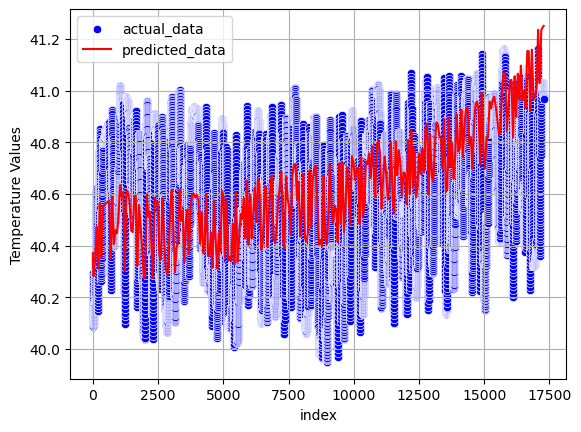

In [186]:

sns.scatterplot(actual_data_lstm,color="blue",label="actual_data")
sns.lineplot(predictions_lstm,color="red",label="predicted_data")
plt.xlabel("index")
plt.ylabel("Temperature Values")
plt.grid(True)

In [178]:
inv_pred_lstm_temp = scaler.inverse_transform(pred_lstm)
predictions_lstm_temp = inv_pred_lstm_temp[:, 3]

actual_lstm_temp = y_test
actual_inv_lstm_temp = scaler.inverse_transform(actual_lstm_temp)
actual_data_lstm_temp = actual_inv_lstm_temp[:, 3]

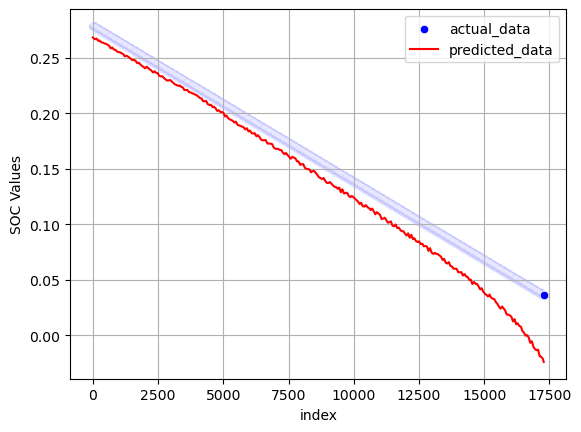

In [182]:
sns.scatterplot(actual_data_lstm_temp,color="blue",label="actual_data")
sns.lineplot(predictions_lstm_temp,color="red",label="predicted_data")
plt.xlabel("index")
plt.ylabel("SOC Values")
plt.grid(True)

In [200]:
from tensorflow.keras.layers import GRU

model = tf.keras.Sequential([
    InputLayer(input_shape=(X_train.shape[1], X_train.shape[2])),
    GRU(100, return_sequences=True),
    Dropout(0.2),
    GRU(100, return_sequences=True),
    Dropout(0.2),
    GRU(100, return_sequences=False),
    Dropout(0.2),
    Dense(50),
    Dense(units=10)
])
earlystopping=EarlyStopping(patience=10,restore_best_weights=True)

model.compile(loss="mean_squared_error",metrics=["mse"],optimizer="adam")
history=model.fit(X_train,y_train,validation_data=[X_test,y_test],epochs=10,callbacks=earlystopping)

F:\Softwares\INSTALL\Anaconda\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning:

Argument `input_shape` is deprecated. Use `shape` instead.



Epoch 1/10
2173/2173 ━━━━━━━━━━━━━━━━━━━━ 174s 79ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 2/10
2173/2173 ━━━━━━━━━━━━━━━━━━━━ 169s 78ms/step - loss: 9.5641e-04 - mse: 9.5641e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 3/10
2173/2173 ━━━━━━━━━━━━━━━━━━━━ 163s 75ms/step - loss: 8.7098e-04 - mse: 8.7098e-04 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 4/10
2173/2173 ━━━━━━━━━━━━━━━━━━━━ 160s 73ms/step - loss: 8.2739e-04 - mse: 8.2739e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 5/10
2173/2173 ━━━━━━━━━━━━━━━━━━━━ 162s 75ms/step - loss: 8.0226e-04 - mse: 8.0226e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 6/10
2173/2173 ━━━━━━━━━━━━━━━━━━━━ 164s 75ms/step - loss: 7.6931e-04 - mse: 7.6931e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 7/10
2173/2173 ━━━━━━━━━━━━━━━━━━━━ 162s 75ms/step - loss: 7.3100e-04 - mse: 7.3100e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 8/10
2173/2173 ━━━━━━━━━━━━━━━━━━━━ 162s 74ms/step - loss: 7.2759e-04 - mse: 7.2759e-

In [229]:
pred=model.predict(X_test)

541/541 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step


In [262]:
inv_pred=scaler.inverse_transform(pred)
predictions=inv_pred[:,3]

In [264]:
actual=y_test
actual_inv=scaler.inverse_transform(actual)
actual_data=actual_inv[:,3]
actual_data

array([0.27889258, 0.27887872, 0.27886486, ..., 0.03618008, 0.03616607,
       0.03615206])

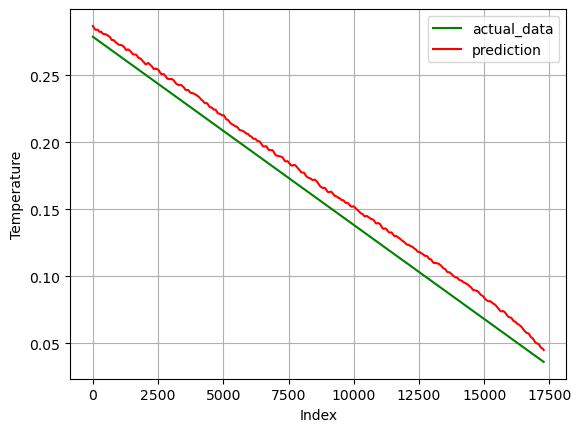

In [266]:

sns.lineplot(actual_data,label="actual_data",color='green')
sns.lineplot(predictions,label="prediction",color="red")
plt.xlabel("Index")
plt.ylabel("Temperature")
plt.grid(True)

In [268]:
inv_pred=scaler.inverse_transform(pred)
predictions=inv_pred[:,6]

In [270]:
actual=y_test
actual_inv=scaler.inverse_transform(actual)
actual_data=actual_inv[:,6]
actual_data

array([40.29265724, 40.28354027, 40.2744233 , ..., 40.97299164,
       40.97143324, 40.96987483])

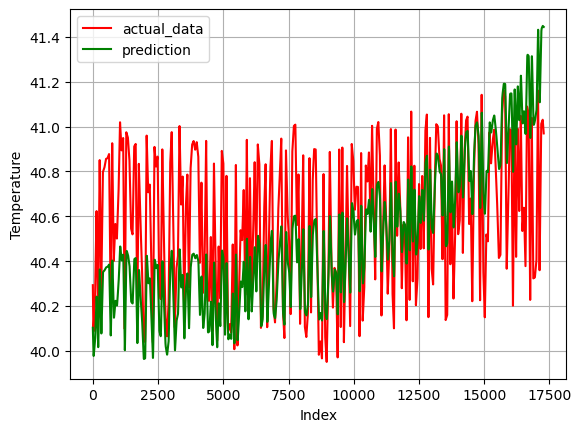

In [290]:

sns.lineplot(actual_data,label="actual_data",color='red')
sns.lineplot(predictions,label="prediction",color='green')
plt.xlabel("Index")
plt.ylabel("Temperature")
plt.grid(True)